In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



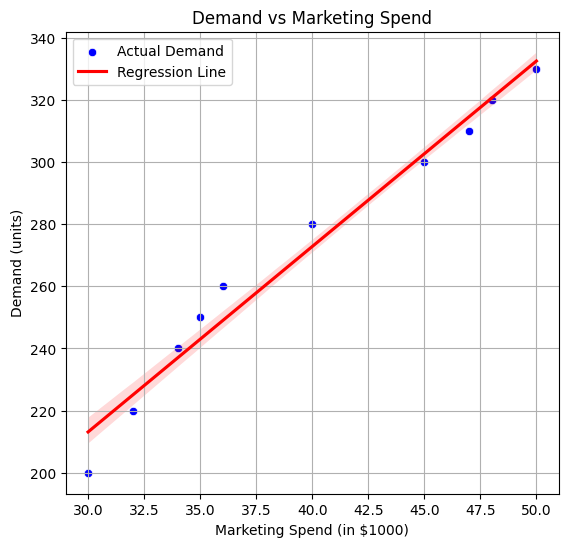

In [3]:
df = pd.DataFrame(data)

# Set up the linear regression model
X = df[['Marketing_Spend', 'Price']]
y = df['Demand']
model = LinearRegression()
model.fit(X, y)

# Predict values
df['Predicted_Demand'] = model.predict(X)

# Create scatter plots with regression lines
plt.figure(figsize=(14, 6))

# Subplot for Marketing Spend vs Demand
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Marketing_Spend', y='Demand', color='blue', label='Actual Demand')
sns.regplot(data=df, x='Marketing_Spend', y='Predicted_Demand', scatter=False, color='red', label='Regression Line')
plt.title('Demand vs Marketing Spend')
plt.xlabel('Marketing Spend (in $1000)')
plt.ylabel('Demand (units)')
plt.legend()
plt.grid()

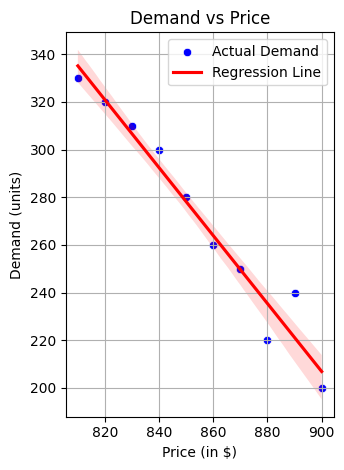

In [4]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Price', y='Demand', color='blue', label='Actual Demand')
sns.regplot(data=df, x='Price', y='Predicted_Demand', scatter=False, color='red', label='Regression Line')
plt.title('Demand vs Price')
plt.xlabel('Price (in $)')
plt.ylabel('Demand (units)')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

C:\Users\ashuc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


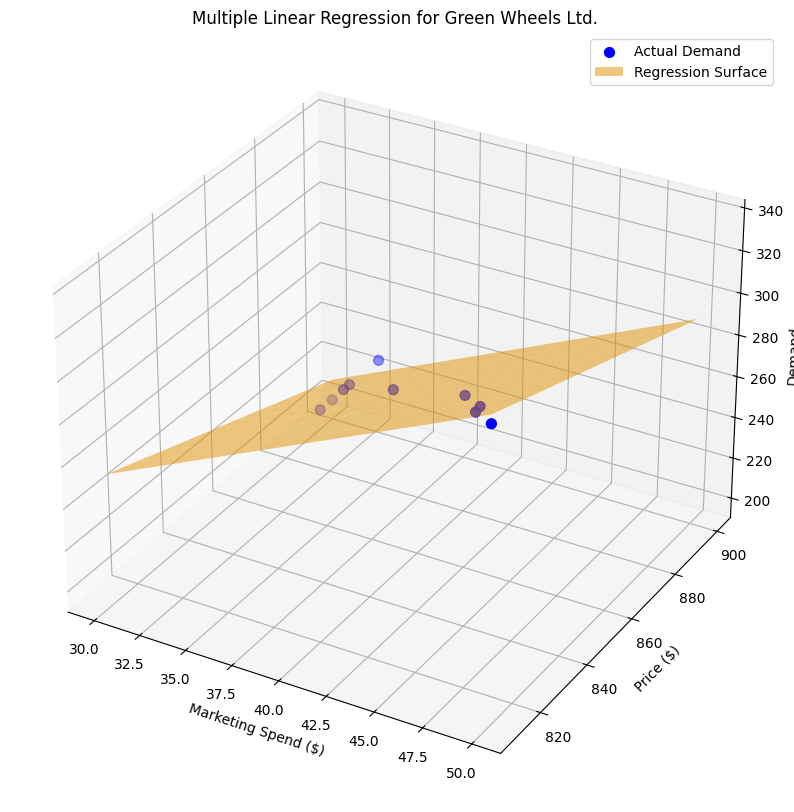

In [8]:


# Define independent variables (X) and dependent variable (y)
X = df[['Marketing_Spend', 'Price']]
y = df['Demand']

# Create and fit the OLS model
model = LinearRegression()
model.fit(X, y)

# Generate a grid of values for plotting
x1_range = np.linspace(X['Marketing_Spend'].min(), X['Marketing_Spend'].max(), 10)
x2_range = np.linspace(X['Price'].min(), X['Price'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict the corresponding y values for the grid
predicted_demand = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
predicted_demand = predicted_demand.reshape(x1_grid.shape)

# Create a 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Marketing_Spend'], X['Price'], y, color='blue', label='Actual Demand', s=50)

# Plot the regression surface
ax.plot_surface(x1_grid, x2_grid, predicted_demand, color='orange', alpha=0.5, label='Regression Surface')

# Label the axes
ax.set_xlabel('Marketing Spend ($)')
ax.set_ylabel('Price ($)')
ax.set_zlabel('Demand')
ax.set_title('Multiple Linear Regression for Green Wheels Ltd.')
ax.legend()

# Show the plot
plt.show()

In [7]:
# Retrieve the coefficients and intercept of the fitted model
intercept = model.intercept_
coefficients = model.coef_

# Construct the demand equation as a string
demand_equation = f"Demand = {intercept:.2f} + ({coefficients[0]:.2f} * Marketing Spend) + ({coefficients[1]:.2f} * Price)"
demand_equation

'Demand = 527.06 + (4.00 * Marketing Spend) + (-0.49 * Price)'

In [9]:
# Define the input values for November (example values for Marketing Spend and Price)
november_data = pd.DataFrame({'Marketing_Spend': [52], 'Price': [800]})

# Forecast demand for November using the fitted model
november_forecast = model.predict(november_data)
november_forecast[0]

np.float64(346.93153423288356)